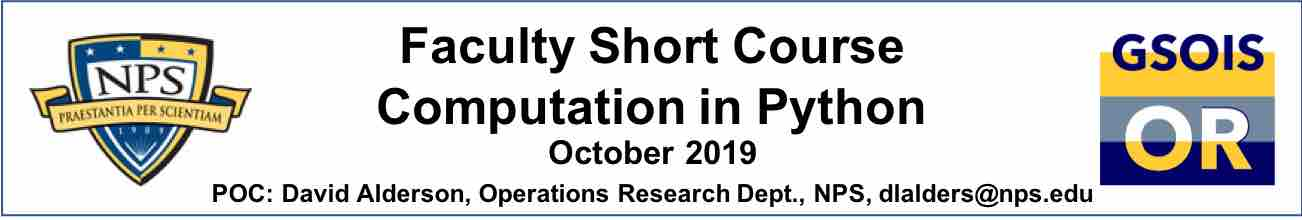

### <center>Lesson 4.3: Pandas, Part 3 (Databases & Database-style Operations)</center>
#### Additional Credit: Dr. Matthew Norton, NPS
This lecture is composed of parts from https://github.com/gardnmi/Pandas-Tutorials/find/master
and https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html

## Pandas: Working with data from an SQL database

Pandas has the ability to read from SQL databases.  In order to enable this functionality, you need to...

### 1. Establish a connection to the database

Depending on the type of database used, you will need to use an appropriate Python library to create a connection.  For example, the ``pysqlite3`` library supports connections to SQLite databases. 

Creating the connection will go something like:
```python 
import sqlite3
connection = sqlite3.connect("my_database.db")
```

### 2. Read data into a pandas dataframe

Querying data from the database then goes something like:
```python
df = pd.read_sql_query("SELECT * FROM table_name", connection)
```

Following this, ``df`` is a DataFrame with the query results.  From there, you can manipulate the data as needed.

### 3. Writing data into the database

Creating a new table goes something like:
```python
df.to_sql('new_table_name', connection)
```

To work with other types of databases, you will need other python libraries.  For example, the ``psycopg2`` library is commonly used with PostgreSQL databases.  You will have to do some research to figure out the specifics for any particular database.

## Database-style DataFrame joining/merging in Pandas !

pandas has full-featured, **high performance** in-memory join operations idiomatically very similar to relational databases like SQL. These methods perform significantly better (in some cases well over an order of magnitude better) than other open source implementations (like base::merge.data.frame in R). The reason for this is careful algorithmic design and internal layout of the data in DataFrame.

See the cookbook for some advanced strategies.

Users who are familiar with SQL but new to pandas might be interested in a comparison with SQL.

pandas provides a single function, merge, as the entry point for all standard database join operations between DataFrame objects:

```python
    merge(left, right, how='inner', on=None, left_on=None, right_on=None,
          left_index=False, right_index=False, sort=True,
          suffixes=('_x', '_y'), copy=True, indicator=False)
```
Here’s a description of what each argument is for:

* left: A DataFrame object


* right: Another DataFrame object


* on: Columns (names) to join on. Must be found in both the left and right DataFrame objects. If not passed and left_index and right_index are False, the intersection of the columns in the DataFrames will be inferred to be the join keys


* left_on: Columns from the left DataFrame to use as keys. Can either be column names or arrays with length equal to the length of the DataFrame


* right_on: Columns from the right DataFrame to use as keys. Can either be column names or arrays with length equal to the length of the DataFrame


* left_index: If True, use the index (row labels) from the left DataFrame as its join key(s). In the case of a DataFrame with a MultiIndex (hierarchical), the number of levels must match the number of join keys from the right DataFrame


* right_index: Same usage as left_index for the right DataFrame


* how: One of 'left', 'right', 'outer', 'inner'. Defaults to inner. See below for more detailed description of each method


* sort: Sort the result DataFrame by the join keys in lexicographical order. Defaults to True, setting to False will improve performance substantially in many cases


* suffixes: A tuple of string suffixes to apply to overlapping columns. Defaults to ('_x', '_y').


* copy: Always copy data (default True) from the passed DataFrame objects, even when reindexing is not necessary. Cannot be avoided in many cases but may improve performance / memory usage. The cases where copying can be avoided are somewhat pathological but this option is provided nonetheless.


* indicator: Add a column to the output DataFrame called _merge with information on the source of each row. _merge is Categorical-type and takes on a value of left_only for observations whose merge key only appears in 'left' DataFrame, right_only for observations whose merge key only appears in 'right' DataFrame, and both if the observation’s merge key is found in both.


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#A helper function for us to use later. Just run this cell.
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

### Brief primer on merge methods relational algebra

Experienced users of relational databases like SQL will be familiar with the terminology used to describe join operations between two SQL-table like structures (DataFrame objects). There are several cases to consider which are very important to understand:

* **one-to-one** joins: the join columns have a one-to-one matching of keys in the columns.
* **many-to-one** joins: the join columns have a many-to-one matching of keys in the columns.
* **many-to-many** joins: the join columns have a many-to-many matching of keys in the columns.

### One-to-one:

In [ ]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display('df1', 'df2')

In [ ]:
df3 = pd.merge(df1, df2, on = 'employee')
display('df3')

### Many-to-one:

In [ ]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})

In [ ]:
result = pd.merge(df3, df4, on = 'group')
display('df3', 'df4', 'result')

### Many-to-Many: 

In [ ]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})


In [ ]:
result = pd.merge(df1, df5, on = 'group')
display('df1', 'df5', 'result')

### Other types of merges: What if one frame has more keys in the join column than the other? 
-  Notice below that there is no info about the "management" key in the right frame.
-  Also no employee fits into the "sales" group.

In [ ]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue','Bill'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR','Management']})

df6 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR','Sales'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization','networking']})
display('df1', 'df6')

The `how` argument to merge specifies how to determine which keys are to be included in the resulting table. Here is a summary of the how options and their SQL equivalent names:

<table border="1" class="docutils" align = "left">
<colgroup>
<col width="20%" />
<col width="20%" />
<col width="60%" />
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Merge method</th>
<th class="head">SQL Join Name</th>
<th class="head">Description</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td><tt class="docutils literal"><span class="pre">left</span></tt></td>
<td><tt class="docutils literal"><span class="pre">LEFT</span> <span class="pre">OUTER</span> <span class="pre">JOIN</span></tt></td>
<td>Use keys from left frame only</td>
</tr>
<tr class="row-odd"><td><tt class="docutils literal"><span class="pre">right</span></tt></td>
<td><tt class="docutils literal"><span class="pre">RIGHT</span> <span class="pre">OUTER</span> <span class="pre">JOIN</span></tt></td>
<td>Use keys from right frame only</td>
</tr>
<tr class="row-even"><td><tt class="docutils literal"><span class="pre">outer</span></tt></td>
<td><tt class="docutils literal"><span class="pre">FULL</span> <span class="pre">OUTER</span> <span class="pre">JOIN</span></tt></td>
<td>Use union of keys from both frames</td>
</tr>
<tr class="row-odd"><td><tt class="docutils literal"><span class="pre">inner</span></tt></td>
<td><tt class="docutils literal"><span class="pre">INNER</span> <span class="pre">JOIN</span></tt></td>
<td>Use intersection of keys from both frames</td>
</tr>
</tbody>
</table>

#### Default behavior is to do "inner" merge, or intersection. Only keeps keys that both frames have in common.

In [ ]:
result = pd.merge(df1, df6, on = 'group', how = 'inner')
display('df1', 'df6', 'result')

#### What if we want to keep info about "Bill", even if his "group" is not in the right frame with "skills" info? Do a "left" merge. Also called "Left Outer" merge.

In [ ]:
result = pd.merge(df1, df6, on = 'group', how = 'left')
display('df1', 'df6', 'result')

#### What if we want to keep info about "Sales", even if no employee matches that "group"? Do a "right" merge. Also called "Right Outer" merge.

In [ ]:
result = pd.merge(df1, df6, on = 'group', how = 'right')
display('df1', 'df6', 'result')

#### What if we want to keep all info, even if the row doesn't have a matching key in the opposite frame? Do a full "outer" merge. Also called "Full Outer" merge or union.

In [ ]:
result = pd.merge(df1, df6, on = 'group' , how = 'outer')
display('df1', 'df6', 'result')

### Some notes:
-  Can use the index as a column to join on: See `left_index` and `right_index` arguments. 
-  Frames don't have to have columns with the same name for `on` argument: See `left_on` and `right_on` arguments.
-  The `join` function is nearly identical to `merge`: It is just a method you call on a frame instead of a function.
-  Can merge `on` mutliple columns. Treats the column pairs as the key to match. 

## Concatenating objects

The concat function (in the main pandas namespace) does all of the heavy lifting of performing concatenation operations along an axis while performing optional set logic (union or intersection) of the indexes (if any) on the other axes. Note that I say “if any” because there is only a single possible axis of concatenation for Series.

Before diving into all of the details of concat and what it can do, here is a simple example:

In [ ]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3'],
                     'C': ['C0', 'C1', 'C2', 'C3'],
                     'D': ['D0', 'D1', 'D2', 'D3']},
                     index=[0, 1, 2, 3]) 

In [ ]:
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                     'B': ['B4', 'B5', 'B6', 'B7'],
                     'C': ['C4', 'C5', 'C6', 'C7'],
                     'D': ['D4', 'D5', 'D6', 'D7']},
                      index=[4, 5, 6, 7])

In [ ]:
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                     'B': ['B8', 'B9', 'B10', 'B11'],
                     'C': ['C8', 'C9', 'C10', 'C11'],
                     'D': ['D8', 'D9', 'D10', 'D11']},
                     index=[8, 9, 10, 11])

In [ ]:
result = pd.concat([df1, df2, df3])
display('df1','df2','df3','result')

<img src="http://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_basic.png" align="left">

Like its sibling function on ndarrays, numpy.concatenate, pandas.concat takes a list or dict of homogeneously-typed objects and concatenates them with some configurable handling of “what to do with the other axes”:

```python
    pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False,
           keys=None, levels=None, names=None, verify_integrity=False)
```
* objs: a sequence or mapping of Series, DataFrame, or Panel objects. If a dict is passed, the sorted keys will be used as the keys argument, unless it is passed, in which case the values will be selected (see below). Any None objects will be dropped silently unless they are all None in which case a ValueError will be raised.
* axis: {0, 1, ...}, default 0. The axis to concatenate along.
* join: {‘inner’, ‘outer’}, default ‘outer’. How to handle indexes on other axis(es). Outer for union and inner for intersection.
* join_axes: list of Index objects. Specific indexes to use for the other n - 1 axes instead of performing inner/outer set logic.
* keys: sequence, default None. Construct hierarchical index using the passed keys as the outermost level. If multiple levels passed, should contain tuples.
* levels : list of sequences, default None. Specific levels (unique values) to use for constructing a MultiIndex. Otherwise they will be inferred from the keys.
* names: list, default None. Names for the levels in the resulting hierarchical index.
* verify_integrity: boolean, default False. Check whether the new concatenated axis contains duplicates. This can be very expensive relative to the actual data concatenation.
* ignore_index : boolean, default False. If True, do not use the index values on the concatenation axis. The resulting axis will be labeled 0, ..., n - 1. This is useful if you are concatenating objects where the concatenation axis does not have meaningful indexing information. Note the index values on the other axes are still respected in the join.
* copy : boolean, default True. If False, do not copy data unnecessarily.


### Set logic on the other axes

When gluing together multiple DataFrames, you have a choice of how to handle the other axes (other than the one being concatenated). This can be done in three ways:

* Take the (sorted) union of them all, join='outer'. This is the default option as it results in zero information loss.
* Take the intersection, join='inner'.
* Use a specific index (in the case of DataFrame) or indexes (in the case of Panel or future higher dimensional objects), i.e. the join_axes argument

Here is a example of each of these methods. First, the default join='outer' behavior:

In [ ]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                  'D': ['D2', 'D3', 'D6', 'D7'],
                  'F': ['F2', 'F3', 'F6', 'F7']},
                 index=[2, 3, 6, 7])

In [ ]:
result = pd.concat([df1, df4], axis=1)
display('df1','df4','result')

<img src="http://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_axis1.png" align="left">

Note that the row indexes have been unioned and sorted. Here is the same thing with join='inner':

In [ ]:
result = pd.concat([df1, df4], axis=1, join='inner')
display('df1','df4','result')

<img src="http://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_axis1_inner.png" align="left">